### This is EDA for DATA TRANSFORMATION STEP

In [2]:
import pandas as pd
import numpy as np

In [3]:
train_file_path = r"E:\ineuron\vs\projects\Forest_Cover_Type_Prediction\forestcover\artifact\data_ingestion\2022-07-21-22-15-29\ingested_data\train\covtype.csv"

In [4]:
traindf = pd.read_csv(train_file_path)
traindf.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3095,318,17,124,18,3264,174,223,188,553,...,0,0,0,0,0,0,0,0,0,1
1,1954,166,18,0,0,95,232,243,135,391,...,0,0,0,0,0,0,0,0,0,3
2,3353,18,21,408,114,3273,199,192,123,2200,...,0,0,0,0,0,0,0,1,0,7
3,2854,170,12,153,17,4596,229,245,147,4712,...,0,0,0,0,0,0,0,0,0,2
4,2942,112,15,42,7,3822,245,223,102,1170,...,0,0,0,0,0,0,0,0,0,2


In [5]:
traindf.shape

(145253, 55)

In [6]:
# Declaring x and y components from the dataframe

x,y = traindf.drop(["Cover_Type"], axis = 1), traindf[["Cover_Type"]]

In [7]:
x.shape

(145253, 54)

In [8]:
y.shape

(145253, 1)

In [9]:
[feature for feature in x.columns if (x[feature].isnull().sum()) > 0]

[]

###### No Null values in the train data, so data imputation not needed. However, we might get NULL values in test or future datasets. So we will be using sklearn's simple imputer to handle such NULL values in the future.

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
# We are using mean replacement. Since this is the default parameter, we dont pass a "strategy" to the SimpleImputer function
simple_imputer = SimpleImputer()

In [12]:
# We need to separate the 10 columns from the dataset which have continuous values
numerical_cols = x.iloc[:,:10]

In [15]:
# Now we separate the remaining columns
categorical_cols =x.iloc[:,10:]

In [13]:
x.head(3)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,3095,318,17,124,18,3264,174,223,188,553,...,0,0,0,0,0,0,0,0,0,0
1,1954,166,18,0,0,95,232,243,135,391,...,0,0,0,0,0,0,0,0,0,0
2,3353,18,21,408,114,3273,199,192,123,2200,...,0,0,0,0,0,0,0,0,1,0


In [14]:
numerical_cols.head(3)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,3095,318,17,124,18,3264,174,223,188,553
1,1954,166,18,0,0,95,232,243,135,391
2,3353,18,21,408,114,3273,199,192,123,2200


In [16]:
categorical_cols.head(3)

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Now we will do imputation

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
# This is using the default strategy as mean
simple_imputer_for_num = SimpleImputer()

In [19]:
simple_imputer_for_num.fit_transform(numerical_cols)

array([[3095.,  318.,   17., ...,  223.,  188.,  553.],
       [1954.,  166.,   18., ...,  243.,  135.,  391.],
       [3353.,   18.,   21., ...,  192.,  123., 2200.],
       ...,
       [3153.,  287.,   17., ...,  237.,  205., 2045.],
       [3065.,  348.,   21., ...,  202.,  159.,  624.],
       [3021.,   26.,   16., ...,  204.,  125., 2496.]])

In [20]:
simple_imputer_for_cat = SimpleImputer(strategy="most_frequent")

In [21]:
simple_imputer_for_cat.fit_transform(categorical_cols)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [63]:
x.shape

(145253, 54)

###### The mean value of each of the non-binary columns will be imputed and trained in fit function in our custom function

In [22]:
for col in numerical_cols.columns:
    print(numerical_cols[col].mean())

2960.159060398064
155.57269729368755
14.08744741933041
269.915808967801
46.46122971642582
2356.071585440576
212.16405857366112
223.28836581688503
142.50479508168505
1984.5613928800094


In [23]:
for col in categorical_cols.columns:
    print(categorical_cols[col].mean())

0.44918865703290123
0.05190942699978658
0.43489635325948517
0.06400556270782704
0.005204711778758442
0.013177008392253517
0.008619443316144934
0.020853269811983228
0.002788238452906308
0.011407681769051242
0.00016522894535741085
0.00030980427254514536
0.0018725947140506565
0.05560642465215865
0.021355841187445355
0.05166846812114036
0.029169793394972908
0.0009087591994657598
6.884539389892119e-06
0.0048604848092638365
0.00561778414215197
0.003290809828368433
0.006684887747585248
0.015806902439192305
0.0015490213627257269
0.05863562198371118
0.09920621260834545
0.03715585908724777
0.0008330292661769465
0.004227107185393761
0.001907017411000117
0.0016522894535741085
0.19837111798035154
0.05195761877551582
0.04469442971917964
0.0905936538315904
0.07760941254225386
0.0026230095075488974
0.0031668881193503747
0.0002134207210866557
0.0005645322299711537
0.026773973687290453
0.02397196615560436
0.014918796857896223


##### We will create our custom transformer so that we can use it for pickle object

In [25]:
class FeatureGenerator():
    
    def __init__(self):
        pass

    def fit(self,X):
        self.features = X.columns
        self.statistic_ = []

        for column in X.columns:
            self.statistic_.append(X[column].mean())
        
        return self

    def transform(self,X:pd.DataFrame):
        for idx,col in enumerate(X.columns):
            X.column.fillna(self.statistic_[idx])
        return X

    def fit_transform(self,X):
        self.fit(X)
        return self.transform(X)

In [26]:
fg_object = FeatureGenerator()
catch = fg_object.fit(numerical_cols)

In [27]:
catch.statistic_

[2960.159060398064,
 155.57269729368755,
 14.08744741933041,
 269.915808967801,
 46.46122971642582,
 2356.071585440576,
 212.16405857366112,
 223.28836581688503,
 142.50479508168505,
 1984.5613928800094]

##### Next we will create pipeline for each set of columns (numerical/categorical). In our case, we have 6 numerical columns which have to be imputated with mean and scaling has to be done. The remaining numerical columns can be left as it is

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [30]:
numerical_pipeline = Pipeline(steps = [
    ("imputer",SimpleImputer()), # We are doing mean imputation here
    ("scaling",MinMaxScaler())
])

In [31]:
categorical_pipeline = Pipeline(steps = [
    ("imputer",SimpleImputer(strategy="most_frequent")), # We are doing most frequent value imputation here
])

In [33]:
numerical_col_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']
       
categorical_col_names = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40']

##### Then we will create our preprocessing object

In [36]:
preprocessing = ColumnTransformer([('numerical',numerical_pipeline,numerical_col_names),
    ('categorical',categorical_pipeline,categorical_col_names)
])

In [37]:
preprocessing.fit_transform(x)

array([[0.61842764, 0.88333333, 0.25757576, ..., 0.        , 0.        ,
        0.        ],
       [0.04707061, 0.46111111, 0.27272727, ..., 0.        , 0.        ,
        0.        ],
       [0.74762143, 0.05      , 0.31818182, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.64747121, 0.79722222, 0.25757576, ..., 0.        , 0.        ,
        0.        ],
       [0.60340511, 0.96666667, 0.31818182, ..., 0.        , 0.        ,
        0.        ],
       [0.58137206, 0.07222222, 0.24242424, ..., 0.        , 0.        ,
        0.        ]])

#### The above transformed data we are going to use for model training

##### To check the transform object for a new dataset

In [38]:
test_file_path = r"E:\ineuron\vs\projects\Forest_Cover_Type_Prediction\forestcover\artifact\data_ingestion\2022-07-21-22-15-29\ingested_data\test\covtype.csv"

In [39]:
testdf = pd.read_csv(test_file_path)

In [40]:
preprocessing.transform(testdf)

array([[0.74661993, 0.57222222, 0.40909091, ..., 1.        , 0.        ,
        0.        ],
       [0.43665498, 0.35833333, 0.10606061, ..., 0.        , 0.        ,
        0.        ],
       [0.3565348 , 0.06666667, 0.13636364, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.47821733, 0.23055556, 0.21212121, ..., 0.        , 0.        ,
        0.        ],
       [0.59439159, 0.2       , 0.18181818, ..., 0.        , 0.        ,
        0.        ],
       [0.50475714, 0.52222222, 0.1969697 , ..., 0.        , 0.        ,
        0.        ]])

### Now we can see we are able to get all feature engineering steps by using the transformation step

### Exporting the pickle file from the EDA steps

In [42]:
import dill

In [43]:
with open('preprocessing.pkl', "wb") as prep_file:
    dill.dump(preprocessing,prep_file)

##### To read the exported preprocessed pickle file

In [44]:
with open('preprocessing.pkl', "rb") as file_obj:
    preprocessing_loaded_obj = dill.load(file_obj)

In [45]:
# This below step is same as transformer.transform(testdf)
preprocessing_loaded_obj.transform(testdf)

array([[0.74661993, 0.57222222, 0.40909091, ..., 1.        , 0.        ,
        0.        ],
       [0.43665498, 0.35833333, 0.10606061, ..., 0.        , 0.        ,
        0.        ],
       [0.3565348 , 0.06666667, 0.13636364, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.47821733, 0.23055556, 0.21212121, ..., 0.        , 0.        ,
        0.        ],
       [0.59439159, 0.2       , 0.18181818, ..., 0.        , 0.        ,
        0.        ],
       [0.50475714, 0.52222222, 0.1969697 , ..., 0.        , 0.        ,
        0.        ]])

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

##### We will be checking the distribution of each column. For this we will eliminate the columns having binary values only such as Soil Type, Wilderness Area and Hillshade columns which have an indexed value from 0 to 255

In [76]:
traindf.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [79]:
disb_check_df = pd.concat((x.iloc[:,:6],x.iloc[:,9]), axis = 1)

In [80]:
disb_check_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points
0,3095,318,17,124,18,3264,553
1,1954,166,18,0,0,95,391
2,3353,18,21,408,114,3273,2200
3,2854,170,12,153,17,4596,4712
4,2942,112,15,42,7,3822,1170


e:\ineuron\vs\projects\Forest_Cover_Type_Prediction\venv_ffcp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\ineuron\vs\projects\Forest_Cover_Type_Prediction\venv_ffcp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\ineuron\vs\projects\Forest_Cover_Type_Prediction\venv_ffcp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

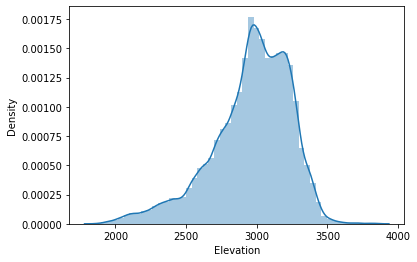

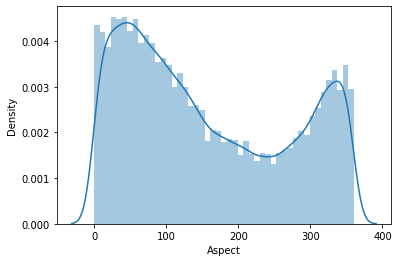

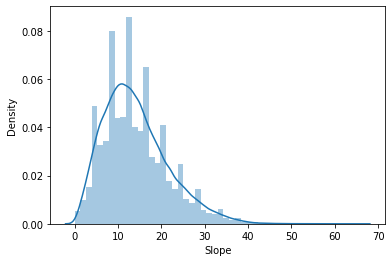

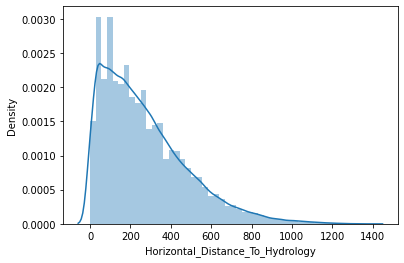

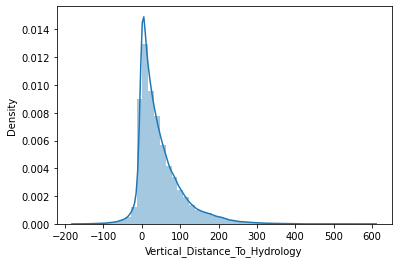

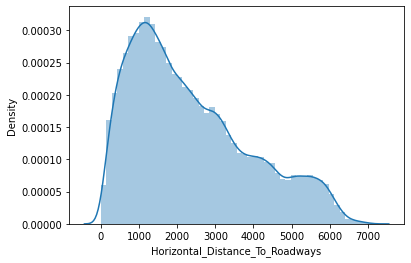

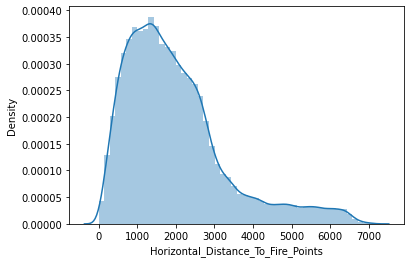

In [81]:
for i, col in enumerate(disb_check_df.columns):
    plt.figure(i)
    ax = sns.distplot(disb_check_df[col])

##### As we can see, most of the values in these columns are skewed, so we need to standardise the columns. We will do this using standard scaler

In [82]:
standardscalar = StandardScaler()

In [84]:
scaled = standardscalar.fit_transform(disb_check_df)